# Feature Map Visualization

This Python notebook just visualizes the feature maps produced by our CNN `cnn_v1.h5`.
The first plot shows all the feature maps/extractors produced by the CNN.

The second plot shows the features identified by the CNN on a positive image (pothole image).
The third plot shows the features identified by the CNN on a negative image (normal road).

In [1]:
from keras import models
from keras_preprocessing import image
from matplotlib import pyplot as plt
from numpy import expand_dims

2022-08-05 11:42:18.729044: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 11:42:18.729087: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = models.load_model('cnn_v1.h5')

2022-08-05 11:42:22.375083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 11:42:22.375390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 11:42:22.375431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-05 11:42:22.375467: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-05 11:42:22.375502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [3]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)


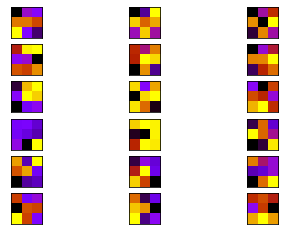

In [4]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()

filters = (filters - f_min) / (f_max - f_min)

n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[:, :, :, i]

    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gnuplot')
        ix += 1

plt.show()

1/1 [==============================] - 0s 69ms/step


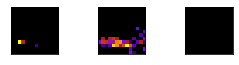

In [6]:
ixs = [0, 2, 4]

outputs = [model.layers[i].output for i in ixs]
model = models.Model(inputs=model.inputs, outputs=outputs)

img = image.load_img('data/test/pothole.jpeg', target_size=(64, 64))
img = image.img_to_array(img)
img = expand_dims(img, axis=0)

feature_maps = model.predict(img)

square = 3
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        ax = plt.subplot(4, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # print(fmap.shape)
        plt.imshow(fmap[0, :, :, ix - 1], cmap='gnuplot')
        ix += 1

plt.show()

1/1 [==============================] - 0s 38ms/step


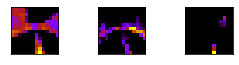

In [7]:
ixs = [0, 2, 4]

outputs = [model.layers[i].output for i in ixs]
model = models.Model(inputs=model.inputs, outputs=outputs)

img = image.load_img('data/test/normal.jpg', target_size=(64, 64))
img = image.img_to_array(img)
img = expand_dims(img, axis=0)

feature_maps = model.predict(img)

square = 3
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        ax = plt.subplot(4, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # print(fmap.shape)
        plt.imshow(fmap[0, :, :, ix - 1], cmap='gnuplot')
        ix += 1

plt.show()